In [1]:
import pandas as pd
from scipy.signal import find_peaks as findPeaks
import matplotlib.pyplot as plt
import numpy as np

In [2]:
l2D = pd.read_csv('ecg2D.csv', header=None)
ecgs = l2D[1].values

Text(0.5, 1.0, 'ECG Signal')

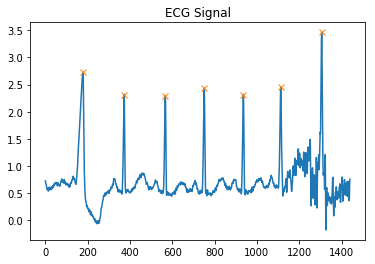

In [3]:
(allPks,_) = findPeaks(ecgs,prominence=1.2)
plt.plot(ecgs)
plt.plot(allPks,ecgs[allPks],'x')
plt.title('ECG Signal')

In [5]:
def extractECG(ecg,pks,offset=30):
    ecgSegms = []
    count = 0
    i = len(pks)
    while count < len(pks)-1:
        ecgSegm = ecgs[allPks[count] -offset : allPks[count+1] - offset]
        print(ecgSegm)
        count = count + 1
        ecgSegms.append(ecgSegm)
    return ecgSegms

In [6]:
segms = extractECG(ecgs,allPks)

[ 0.755  0.805  0.845  0.905  0.95   1.     1.095  1.2    1.295  1.355
  1.4    1.47   1.55   1.645  1.71   1.77   1.84   1.915  1.965  2.015
  2.085  2.155  2.25   2.34   2.42   2.495  2.55   2.605  2.655  2.685
  2.725  2.725  2.57   2.205  1.77   1.395  1.095  0.88   0.75   0.62
  0.525  0.45   0.4    0.375  0.345  0.34   0.315  0.28   0.25   0.27
  0.265  0.24   0.225  0.21   0.205  0.21   0.22   0.215  0.18   0.155
  0.165  0.19   0.19   0.185  0.155  0.115  0.1    0.13   0.145  0.155
  0.14   0.1    0.085  0.09   0.1    0.08   0.07   0.07   0.06   0.07
  0.055  0.045  0.025  0.02   0.02   0.01   0.03   0.015 -0.005 -0.03
 -0.015 -0.025 -0.015 -0.03  -0.05  -0.06  -0.065 -0.03  -0.015 -0.03
 -0.05  -0.06  -0.055 -0.03  -0.01  -0.015 -0.05  -0.055 -0.03   0.
  0.03   0.035  0.045  0.07   0.1    0.135  0.185  0.225  0.225  0.24
  0.265  0.295  0.315  0.35   0.355  0.37   0.385  0.42   0.455  0.46
  0.455  0.44   0.445  0.44   0.45   0.5    0.495  0.475  0.465  0.49
  0.505  0.495  0

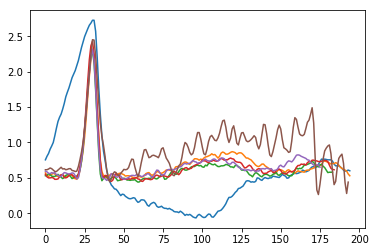

In [7]:
segment1 = segms[0]
segment2 = segms[1]
segment3 = segms[2]
segment4 = segms[3]
segment5 = segms[4]
segment6 = segms[5]
plt.plot(segms[0])
plt.plot(segms[1])
plt.plot(segms[2])
plt.plot(segms[3])
plt.plot(segms[4])
plt.plot(segms[5])

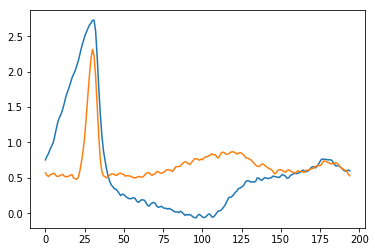

In [8]:
plt.figure()
plt.plot(segment1)
plt.plot(segment2)

In [9]:
def calDists(x, y):
    dists = np.zeros((len(y),len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            dists[i,j] = (y[i]-x[j])**2
    return dists

In [10]:
def DTWOptPatch(x, y, acuCost):
    i = len(y)-1
    j = len(x)-1
    path = [[j,i]]
    while (i > 0) and (j > 0):
        if i==0:
            j = j-1
        elif j==0:
            i = i-1
        else:
            if acuCost[i-1,j] == min(acuCost[i-1,j-1],
                acuCost[i-1,j],
                acuCost[i,j-1]):
                i = i-1
            elif acuCost[i,j-1] == min(acuCost[i-1,j-1],
                acuCost[i-1,j],
                acuCost[i,j-1]):
                j = j-1
            else:
                i = i-1
                j = j-1
        path.append([j,i])
    path.append([0,0])
    return path

In [11]:
def pltDistances(dists,xlab="segment 1",ylab="segment 2",clrmap="viridis"):
    imgplt = plt.figure()
    plt.imshow(dists,
    interpolation='nearest',
    cmap=clrmap)
    plt.gca().invert_yaxis()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid()
    plt.colorbar()

In [12]:
def computeCostMatrix(dists):
    acuCost = np.zeros(dists.shape)
    acuCost[0,0]= dists[0,0]
    for j in range(1,dists.shape[1]):
        acuCost[0,j] = dists[0,j]+acuCost[0,j-1]
    for i in range(1,dists.shape[0]):
        acuCost[i,0] = dists[i,0]+acuCost[i-1,0]
    for i in range(1,dists.shape[0]):
        for j in range(1,dists.shape[1]):
            acuCost[i,j] = min(acuCost[i-1,j-1],
            acuCost[i-1,j],
            acuCost[i,j-1])+dists[i,j]
    return acuCost

In [13]:
def pltCostAndPath(acuCost,path,xlab="X",ylab="Y",clrmap="viridis"):
    px = [pt[0] for pt in path]
    py = [pt[1] for pt in path]
    imgplt = pltDistances(acuCost,
    xlab=xlab,
    ylab=ylab,
    clrmap=clrmap)
    plt.plot(px,py)

In [14]:
def pltWarp(s1,s2,path,xlab="idx",ylab="Value"):
    imgplt = plt.figure()
    for [idx1,idx2] in path:
        plt.plot([idx1,idx2],[s1[idx1],s2[idx2]],color="C4",linewidth=2)
    plt.plot(s1,'o-',color="C0",markersize=3)
    plt.plot(s2,'s-',color="C1",markersize=2)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

In [15]:
dists1 = calDists(segment1, segment2)
costMatrix1 = computeCostMatrix(dists1)
path1 = DTWOptPatch(segment1, segment2, costMatrix1)

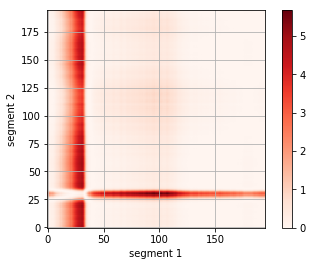

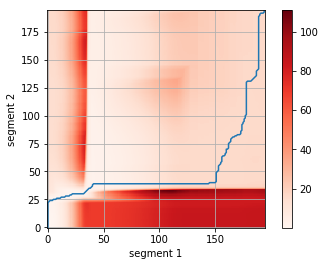

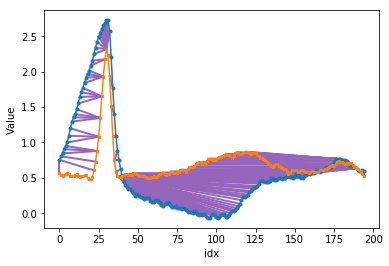

In [16]:
pltDistances(dists1, xlab="segment 1",ylab="segment 2", clrmap="Reds")
pltCostAndPath(costMatrix1,path1,xlab="segment 1",ylab="segment 2", clrmap='Reds')
pltWarp(segment1,segment2,path1)

dist: 184
195
195
184
185
176
194


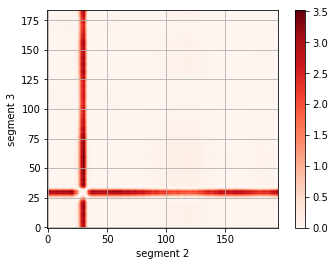

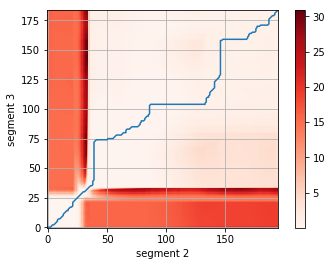

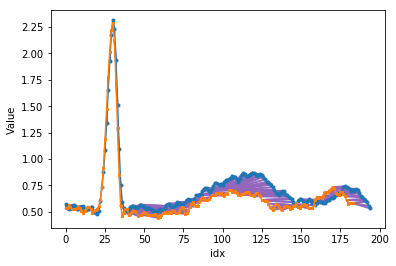

In [17]:
dists2 = calDists(segment2, segment3)
costMatrix2 = computeCostMatrix(dists2)
print("dist:", len(dists2))
print(len(segment1))
print(len(segment2))
print(len(segment3))
print(len(segment4))
print(len(segment5))
print(len(segment6))
# print(len(costMatrix2))
# print(len(dists2))
path2 = DTWOptPatch(segment2, segment3, costMatrix2)
pltDistances(dists2, xlab="segment 2",ylab="segment 3", clrmap="Reds")
pltCostAndPath(costMatrix2,path2,xlab="segment 2",ylab="segment 3", clrmap='Reds')
pltWarp(segment2,segment3,path2)

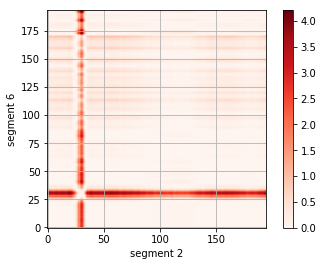

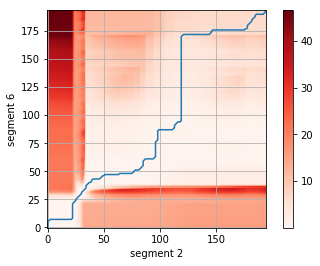

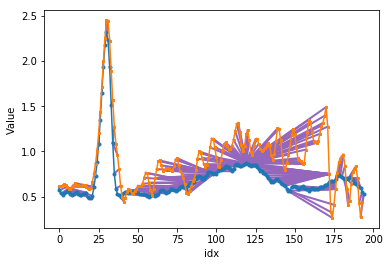

In [18]:
dists3 = calDists(segment2, segment6)
costMatrix3 = computeCostMatrix(dists3)
path3 = DTWOptPatch(segment2, segment6, costMatrix3)
pltDistances(dists3, xlab="segment 2",ylab="segment 6", clrmap="Reds")
pltCostAndPath(costMatrix3,path3, xlab="segment 2",ylab="segment 6",clrmap='Reds')
pltWarp(segment2,segment6,path3)